In [54]:
from selenium import webdriver

driver = webdriver.Chrome('c:/webdriver/chromedriver.exe')
driver.get('https://instagram.com')

C:\Users\tjoeun709\AppData\Local\Temp\ipykernel_7564\3484374977.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('c:/webdriver/chromedriver.exe')


In [30]:
import time

def login(driver) :
    time.sleep(2)
    user = 'senny_._'
    pwd = '***'         # pwd 지워놓음 !!!!!

    m_id = driver.find_element_by_name('username')
    m_pw = driver.find_element_by_name('password')

    m_id.clear()
    m_id.send_keys(user)
    m_pw.clear()
    m_pw.send_keys(pwd)

    driver.find_element_by_css_selector('#loginForm > div > div:nth-child(3) > button').click()
    time.sleep(3)
    driver.find_element_by_css_selector('#react-root > section > main > div > div > div > div > button').click()
    time.sleep(2)
    driver.find_element_by_css_selector('body > div.RnEpo.Yx5HN > div > div > div > div.mt3GC').click()


In [31]:
## 인스타그램의 검색 결과 url을 반환하는 함수
def insta_search(word) :
    url = 'https://www.instagram.com/explore/tags/'+word
    return url

word = '제주도맛집'
url = insta_search(word)

driver.get(url)

In [33]:
## 첫번째 피드 클릭하기

def select_first(driver) :
    first = driver.find_element_by_class_name('_9AhH0')
    first.click()
    time.sleep(2)
    
select_first(driver)

In [205]:
### 본문 내용 가져오기

from bs4 import BeautifulSoup
import unicodedata
import re

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

try : 
    content = soup.select('div.MOdxS > span')[0].text
    content = unicodedata.normalize('NFC',content)
except : content = ' '

### 본문 내용에서 해시태그 가져오기

tags = re.findall('#\w+', content)      # r'#[^\s#,\\]+  -> #으로 시작, # 이전까지의 텍스트 추출 (\\ = 제외)
print(tags)

### 작성일자 가져오기
date = soup.select('time.FH9sR.RhOlS')[0]['datetime'][:10]
print(date)

### 좋아요 수 가져오기
try :
    like = soup.select('div._7UhW9.xLCgt.qyrsm.KV-D4.fDxYl.T0kll > span')[0].text
except : like = '0'
print(like)

### 위치정보 가져오기
try :
    location = soup.select('a.O4GlU')[0].text 
except : location = ''
print(location)

['#제주공항근처맛집', '#제주도맛집', '#제주맛집', '#제주연동맛집', '#연동맛집', '#제주공항맛집', '#노형동맛집', '#신제주맛집', '#제주시내맛집', '#제주도민맛집', '#제주현지맛집', '#메종글래드제주맛집', '#제주도청맛집', '#제주시청맛집']
2022-05-20
153



In [ ]:
### 다음 게시글로 이동
right = driver.find_element_by_css_selector('div.l8mY4.feth3 > button')
right.click()

### 인스타 크롤링 자동화 프로그래밍 

In [68]:
#### 필요한 함수 작성

# 로그인

def login2(driver, user, pwd) :
    time.sleep(2)

    m_id = driver.find_element_by_name('username')
    m_pw = driver.find_element_by_name('password')

    m_id.clear()
    m_id.send_keys(user)
    m_pw.clear()
    m_pw.send_keys(pwd)

    driver.find_element_by_css_selector('#loginForm > div > div:nth-child(3) > button').click()
    time.sleep(3)
    driver.find_element_by_css_selector('#react-root > section > main > div > div > div > div > button').click()
    time.sleep(2)
    driver.find_element_by_css_selector('body > div.RnEpo.Yx5HN > div > div > div > div.mt3GC').click()
    
# 검색 키워드의 url 생성
def insta_search2(word) :
    url = 'https://www.instagram.com/explore/tags/'+word
    return url

# 첫 번째 페이지 클릭

def select_first2(driver) :
    first = driver.find_element_by_class_name('_9AhH0')
    first.click()
    time.sleep(2)

# 키워드에 따른 페이지로 이동
def insta_searching(driver, word) :    
    url = insta_search2(word)
    driver.get(url)
    time.sleep(5)
    select_first2(driver)
    time.sleep(3)
    
def get_content(driver) :
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    data = []
    
    # 피드 본문 가져오기
    try : 
        content = soup.select('div.MOdxS > span')[0].text
        content = unicodedata.normalize('NFC',content)
    except : content = ''
    
    # 본문의 해시태그 가져오기
    tags = re.findall('#\w+', content)      # r'#[^\s#,\\]+  -> #으로 시작, # 이전까지의 텍스트 추출 (\\ = 제외)
    
    # 작성일자 가져오기
    date = soup.select('time._1o9PC')[0]['datetime'][0:10]
    
    # 좋아요 수 가져오기
    try :
        like = soup.select('div._7UhW9.xLCgt.qyrsm.KV-D4.fDxYl.T0kll > span')[0].text
    except : like = '0'

    # 위치정보 가져오기
    try :
        location = soup.select('a.O4GlU')[0].text 
    except : location = ''
    
    data = [content, tags, date, like, location]    
    return data

def move_next(driver) :
    right = driver.find_element_by_css_selector('div.l8mY4.feth3 > button')
    right.click()
    
def save_data(result, word) :
    total = pd.DataFrame(result, columns=['content', 'tags', 'date', 'like', 'location'])
    total.to_excel(f'data/{word}.xlsx',index=False)


In [ ]:
from selenium import webdriver

word = '제주도맛집'


driver = webdriver.Chrome('c:/webdriver/chromedriver.exe')
driver.get('https://instagram.com')
user = 'senny_._'
pwd = 'dywjd335664'
login2(driver, user, pwd)       # 로그인 함수
insta_searching(driver, words[i])       # 키워드로 접속 + 첫 페이지 클릭
result = []

for x in range(50) :
    time.sleep(1)
    data = get_content(driver)
    result.append(data)
    move_next(driver)
    time.sleep(1)
    
save_data(result, word)
    

##### 로그인 후에 추가적으로 크롤링 필요할 때 함수 

In [35]:
## 로그인 후에 추가적으로 크롤링 필요할 때 함수!!!

def crawling_after_login(words) :
    for word in words :
        insta_searching(driver, word)       # 키워드로 접속 + 첫 페이지 클릭
        result = []

        for x in range(50) :
            time.sleep(1)
            data = get_content(driver)
            result.append(data)
            move_next(driver)
            time.sleep(1)
            
        save_data(result, word)

# 생성하기
crawling_after_login(['제주도맛집','제주맛집','제주여행','제주관광'])

#### 각 파일을 통합하기 

In [50]:
import pandas as pd
jeju_insta_df = pd.DataFrame([])

for name in ['제주관광','제주도맛집','제주맛집','제주여행'] :
    tmp = pd.read_excel(f'data/{name}.xlsx', usecols='A:E')
    jeju_insta_df = pd.concat([jeju_insta_df,tmp], ignore_index=True)
    
jeju_insta_df.head()

,content,tags,date,like,location
0,"8000평의 넓은 공간으로 공예전시관, 체험관, 기념품샵, 카페, 산책로 등이 있어...","['#서귀포가볼만한곳', '#제주유리박물관방문', '#제주유리박물관', '#제주여행...",2022-01-08,138,제주유리박물관
1,[귀염뽀짝 구경하기 좋은 #제주소품샵 모음!]아기자기한 소품들 천국에 구경하다보면 ...,"['#제주소품샵', '#제주쇼핑', '#제주소품', '#제주소품샵추천', '#제주관...",2022-05-02,"2,246",NaN
2,안녕!,[],2022-03-17,0,화조원
3,물의 화백이 남기고 간 안식처 💧김창열미술관은 제주도에 있는 전시관 중 그리 유명한...,"['#김창열미술관', '#김창열', '#제주도', '#제주도여행', '#제주도관광'...",2022-04-05,"4,075",제주도립 김창열미술관
4,✈️,[],2022-04-23,0,Gimpo International Airport - 金浦国际机场 - 김포공항


In [51]:
jeju_insta_df.drop_duplicates(subset=['content'], inplace=True)     # 중복 제거
jeju_insta_df.to_excel('data/crawling_rows.xlsx', index=False)      # 엑셀로 저장

### 해시태그 분석하기 

In [53]:
#### 크롤링 결과 중 해시태그 데이터 불러오기
import pandas as pd

row_total = pd.read_excel('data/crawling_rows.xlsx')
row_total['tags']

0      ['#서귀포가볼만한곳', '#제주유리박물관방문', '#제주유리박물관', '#제주여행...
1      ['#제주소품샵', '#제주쇼핑', '#제주소품', '#제주소품샵추천', '#제주관...
2                                                     []
3      ['#김창열미술관', '#김창열', '#제주도', '#제주도여행', '#제주도관광'...
4                                                     []
                             ...                        
165                                                   []
166           ['#제주도', '#제주', '#제주여행', '#하하호호', '#수제버거']
167                                                   []
168    ['#2022', '#제주여행', '#한라산', '#성판악코스', '#백록담', '...
169    ['#제주여행', '#제주광이멀스테이', '#제주광이멀스테이풀빌라펜션', '#제주풀...
Name: tags, Length: 170, dtype: object

In [57]:
### 해시태그 통합 저장하기
tags_total = []

for tags in row_total['tags'] :
    
    # [2:-2] : 양쪽 끝의 대괄호 기호 제거
    # list형태로 넣어 str이 된 데이터를 , 기점으로구분함
    tags_list = tags[2:-2].split("', '")

    for tag in tags_list :
        tags_total.append(tag)


row_total['tags'][0]
row_total['tags'][0][2:-2].split("', '")

['#서귀포가볼만한곳',
 '#제주유리박물관방문',
 '#제주유리박물관',
 '#제주여행',
 '#제주가볼만한곳',
 '#제주도가볼만한곳',
 '#중문가볼만한곳',
 '#제주이색체험',
 '#제주카페',
 '#제주관광',
 '#유리박물관',
 '#제주유리박물관방문']

#### 해시태그 빈도수 집계 

In [60]:
### 해시태그 빈도수 집계
from collections import Counter
tag_counts = Counter(tags_total)

tag_counts
tag_counts.most_common(50)

[('#제주여행', 61),
 ('#제주맛집', 51),
 ('#제주도맛집', 38),
 ('', 31),
 ('#제주', 28),
 ('#제주관광', 27),
 ('#제주도', 25),
 ('#제주도여행', 23),
 ('#제주가볼만한곳', 20),
 ('#제주카페', 16),
 ('#서귀포맛집', 16),
 ('#제주공항근처맛집', 13),
 ('#제주핫플', 11),
 ('#제주도민맛집', 11),
 ('#제주맛집추천', 10),
 ('#jeju', 9),
 ('#제주살이', 9),
 ('#제주도가볼만한곳', 8),
 ('#제주데이트코스', 8),
 ('#제주여행추천', 8),
 ('#제주흑돼지맛집', 8),
 ('#애월맛집', 8),
 ('#제주시맛집', 8),
 ('#여행스타그램', 7),
 ('#서귀포', 7),
 ('#여행', 7),
 ('#서귀포가볼만한곳', 6),
 ('#제주유리박물관방문', 6),
 ('#제주실내관광지', 6),
 ('#제주여행코스', 6),
 ('#제주일상', 6),
 ('#제주공항맛집', 6),
 ('#제주도카페', 6),
 ('#중문맛집', 6),
 ('#여행에미치다', 6),
 ('#제주관광지', 5),
 ('#제주공항', 5),
 ('#제주맘', 5),
 ('#jejuisland', 5),
 ('#서귀포카페', 5),
 ('#연동맛집', 5),
 ('#성산맛집', 5),
 ('#중문가볼만한곳', 4),
 ('#제주소품샵', 4),
 ('#수월봉', 4),
 ('#협재맛집', 4),
 ('#육성가', 4),
 ('#제주도흑돼지', 4),
 ('#섭지코지맛집', 4),
 ('#제주중문맛집', 4)]

#### 데이터 정제 

In [61]:
### 데이터 정제

STOPWORD = ['#제주도','#제주', '', '#jeju', '#선팔맞팔', '#제주맘', \
            '#일상', '#먹스타맞팔', '#좋아요', '#키니샵', '#먹스타그램맞팔', '#jejuisland']

tags_total_selected = []
for tag in tags_total :
    if tag not in STOPWORD :
        tags_total_selected.append(tag)

tags_counts_selected = Counter(tags_total_selected)
tags_counts_selected.most_common(50)

[('#제주여행', 61),
 ('#제주맛집', 51),
 ('#제주도맛집', 38),
 ('#제주관광', 27),
 ('#제주도여행', 23),
 ('#제주가볼만한곳', 20),
 ('#제주카페', 16),
 ('#서귀포맛집', 16),
 ('#제주공항근처맛집', 13),
 ('#제주핫플', 11),
 ('#제주도민맛집', 11),
 ('#제주맛집추천', 10),
 ('#제주살이', 9),
 ('#제주도가볼만한곳', 8),
 ('#제주데이트코스', 8),
 ('#제주여행추천', 8),
 ('#제주흑돼지맛집', 8),
 ('#애월맛집', 8),
 ('#제주시맛집', 8),
 ('#여행스타그램', 7),
 ('#서귀포', 7),
 ('#여행', 7),
 ('#서귀포가볼만한곳', 6),
 ('#제주유리박물관방문', 6),
 ('#제주실내관광지', 6),
 ('#제주여행코스', 6),
 ('#제주일상', 6),
 ('#제주공항맛집', 6),
 ('#제주도카페', 6),
 ('#중문맛집', 6),
 ('#여행에미치다', 6),
 ('#제주관광지', 5),
 ('#제주공항', 5),
 ('#서귀포카페', 5),
 ('#연동맛집', 5),
 ('#성산맛집', 5),
 ('#중문가볼만한곳', 4),
 ('#제주소품샵', 4),
 ('#수월봉', 4),
 ('#협재맛집', 4),
 ('#육성가', 4),
 ('#제주도흑돼지', 4),
 ('#섭지코지맛집', 4),
 ('#제주중문맛집', 4),
 ('#제주라이프', 4),
 ('#국내여행', 4),
 ('#제주바다', 4),
 ('#제주유리박물관', 3),
 ('#제주이색체험', 3),
 ('#유리박물관', 3)]

#### 정제한 데이터 시각화 

In [63]:
import matplotlib.pyplot as plt

# 한글 출력이 가능한 폰트로 설정하기
from matplotlib import font_manager, rc
import platform     # 플랫폼 관련 라이브러리 - 각각의 플랫폼에 따른 폰트 설정을 위해

platform.system()   # Windows

if platform.system() == 'Windows' :
    path = 'c:/windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin' :
    rc('font', family='AppleGothic')
else :
    print('check your OS system')

<AxesSubplot:xlabel='counts', ylabel='tags'>

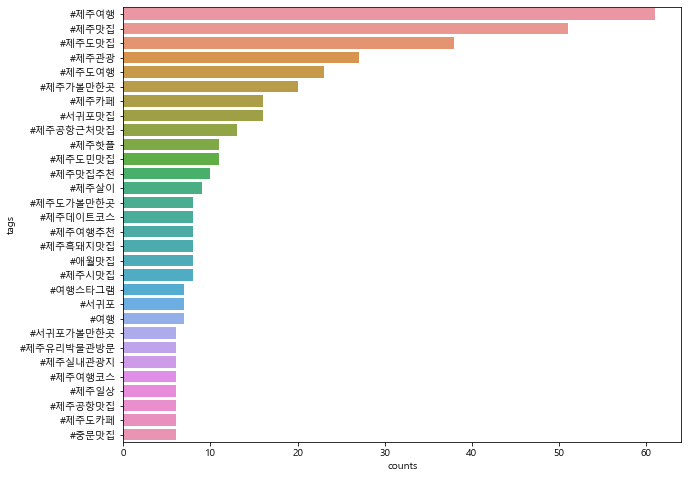

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

tags_counts_df = pd.DataFrame(tags_counts_selected.most_common(30))
tags_counts_df.columns = ['tags','counts']

plt.figure(figsize=(10,8))
sns.barplot(x='counts',y='tags',data=tags_counts_df)

#### 워드클라우드로 시각화 

In [82]:
### 워드클라우드 불러오기
# pip install wordcloud         # 오류 뜨면 Visual Studio Build Tool 설치하기
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

# 폰트 설정
if platform.system() == 'Windows' :     #윈도우
    font_path = 'c:/Windows/Fonts/malgun.ttf'
elif platform.system() == 'Darwin' :    # 맥
    font_path = '/Users/$USER/Library/Fonts/AppleGothic.ttf'

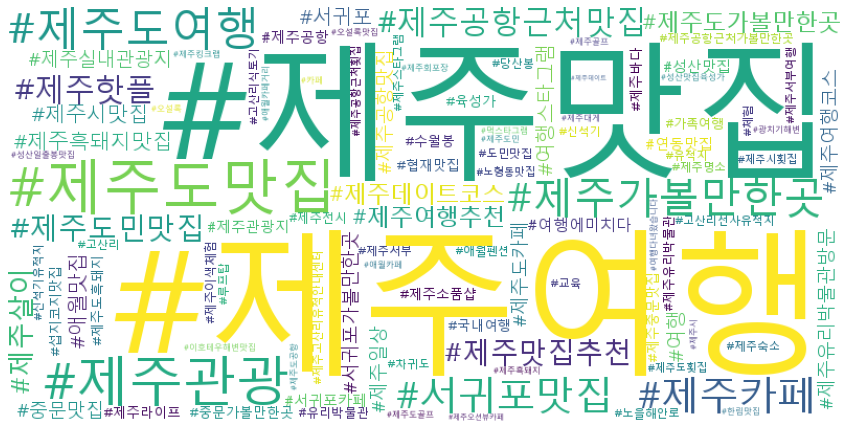

In [84]:
wordcloud = WordCloud(
                    font_path=font_path, background_color='white', max_words=100, \
                    relative_scaling=0.3, width = 800, height = 400
                    ).generate_from_frequencies(tags_counts_selected)

plt.figure(figsize=(15, 10))
plt.axis('off')

plt.imshow(wordcloud)
plt.savefig('data/tag_wordcloud.png')